## Histograms and similar plots

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

In [21]:
import utils.load_grid as lg
from utils.load_cmaps import *

In [22]:
pgrid_dir = "data/article_data/jgr_grid_final"
cases = lg.get_cases(pgrid_dir)

In [23]:
helps, hvars = lg.load_helpfiles(cases)

Helpfiles: 100%|██████████| 1029/1029 [00:25<00:00, 40.52it/s]


In [24]:
%matplotlib widget

In [25]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

### Termination year

Statistics:
	 argmin:  23 idx
	 Minimum: 7.194e+04 yr
	 Median:  2.881e+06 yr
	 Mean:    5.312e+06 yr
	 Maximum: 2.041e+08 yr
	 argmax:  635 idx


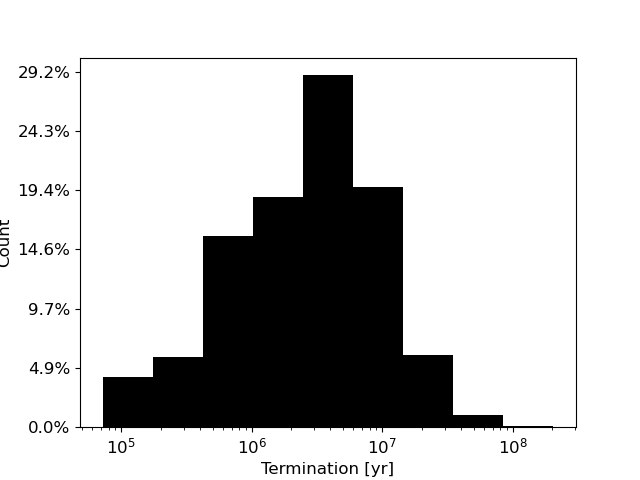

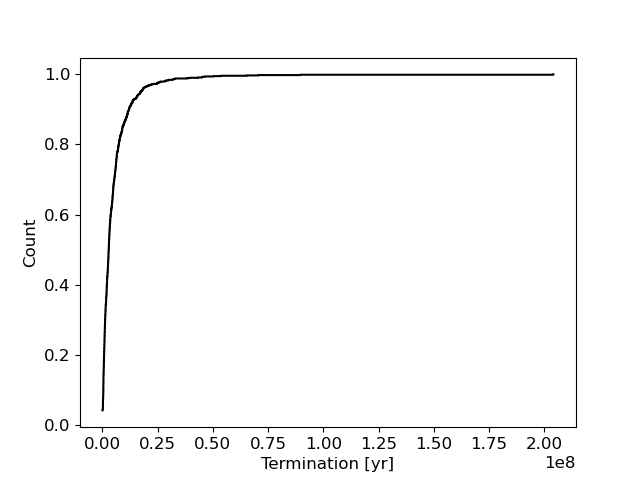

In [26]:
endt = lg.access_hvars(hvars,"Time",-1)

print("Statistics:")
print("\t argmin:  %d idx" %  np.argmin(endt))
print("\t Minimum: %.3e yr" % np.amin(endt))
print("\t Median:  %.3e yr" % np.median(endt))
print("\t Mean:    %.3e yr" % np.mean(endt))
print("\t Maximum: %.3e yr" % np.amax(endt))
print("\t argmax:  %d idx" %  np.argmax(endt))

nbins = 10
endt = np.sort(endt)

fig,ax = plt.subplots(1,1)
logbins = np.logspace(np.log10(np.amin(endt)),np.log10(np.amax(endt)),nbins)
ax.hist(endt, bins=logbins, color='black')
ax.set_xlabel("Termination [yr]")
ax.set_xscale("log")
ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(PercentFormatter(len(endt)))
plt.show()

fig,ax = plt.subplots(1,1)
x, y = ecdf(endt)
ax.plot(x, y, color='black', drawstyle='steps-post')
ax.set_xlabel("Termination [yr]")
ax.set_ylabel("Count")
plt.show()

### Final total surface pressure

Statistics:
	 Minimum: 2.715e+00 bar
	 Median:  2.992e+02 bar
	 Mean:    9.835e+02 bar
	 Maximum: 6.920e+03 bar


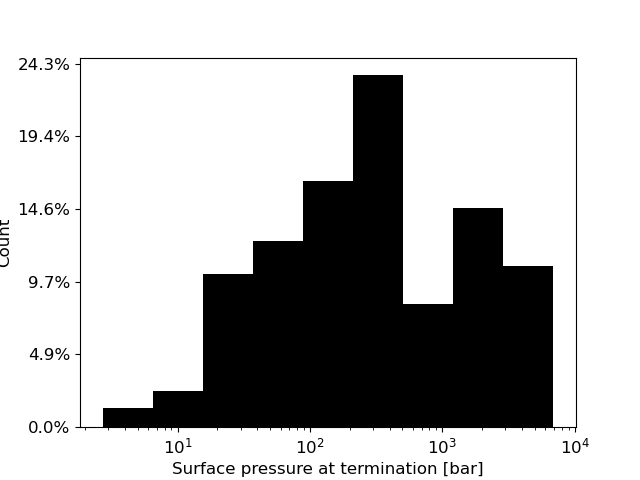

In [27]:
endp = lg.access_hvars(hvars,"P_surf",-1)
endp = np.sort(endp)

print("Statistics:")
print("\t Minimum: %.3e bar" % np.amin(endp))
print("\t Median:  %.3e bar" % np.median(endp))
print("\t Mean:    %.3e bar" % np.mean(endp))
print("\t Maximum: %.3e bar" % np.amax(endp))

fig,ax = plt.subplots(1,1)
logbins = np.logspace(np.log10(np.amin(endp)),np.log10(np.amax(endp)),nbins)
ax.hist(endp, bins=logbins, color='black')
ax.set_xlabel("Surface pressure at termination [bar]")
ax.set_xscale("log")
ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(PercentFormatter(len(endp)))
plt.show()

### Final surface temperature

Statistics:
	 Minimum: 1.588e+03 K
	 Median:  1.739e+03 K
	 Mean:    1.987e+03 K
	 Maximum: 3.339e+03 K


/tmp/user/27339/ipykernel_1685846/2803685213.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,1)


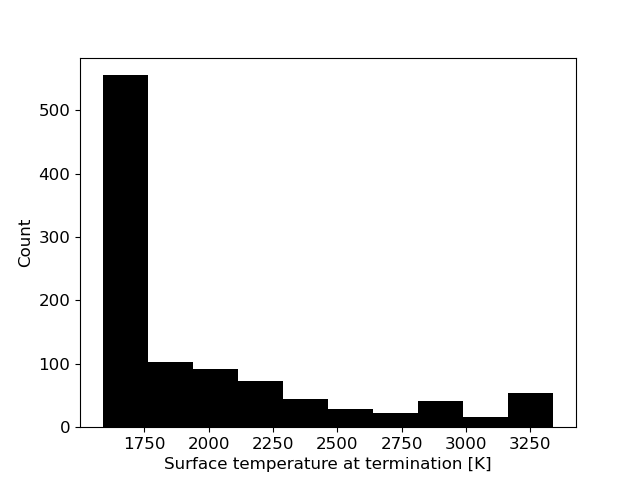

In [28]:
endtmp = lg.access_hvars(hvars,"T_surf",-1)
endtmp = np.sort(endtmp)

print("Statistics:")
print("\t Minimum: %.3e K" % np.amin(endtmp))
print("\t Median:  %.3e K" % np.median(endtmp))
print("\t Mean:    %.3e K" % np.mean(endtmp))
print("\t Maximum: %.3e K" % np.amax(endtmp))

fig,ax = plt.subplots(1,1)
ax.hist(endtmp, color='black')
ax.set_xlabel("Surface temperature at termination [K]")
ax.set_ylabel("Count")
plt.show()